Student Details

Name: Vipul Popat

ID: 18195121

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
def plot_classifier(classifier, title=None):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

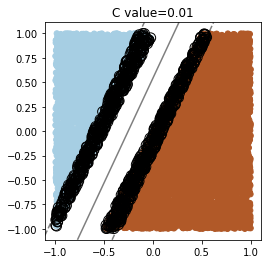

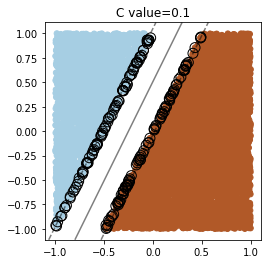

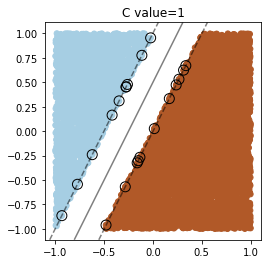

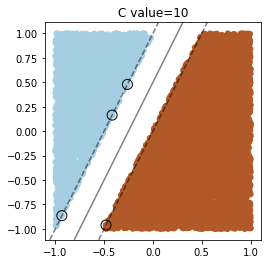

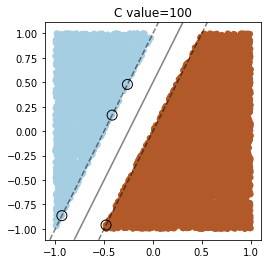

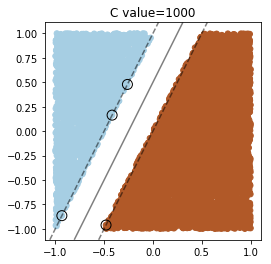

In [3]:
dataset = pd.read_csv('dataset_1.csv', index_col=0)
# target attribute
target_attribute_name = '2'
y = dataset[target_attribute_name].values

# predictor attributes
X = dataset.drop(target_attribute_name, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C_vals = [0.01, 0.1, 1, 10, 100, 1000]
tuned_params = []

for value in C_vals:
    tune_param = {'kernel': ['linear'], 'C': [value]}
    tuned_params.append(tune_param)
    classifier = GridSearchCV(svm.SVC(), tune_param, scoring='accuracy')
    classifier.fit(X_train, y_train)
    plot_classifier(classifier.best_estimator_, 'C value={}'.format(value))

The number of support vectors identified is inversely proportional to the value of C

Hence lower the value of C - higher is the risk of underfitting